<a href="https://colab.research.google.com/github/JeanMusenga/PhD-Thesis_2024_Musenga/blob/main/Classifiers_with_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Important and helpful sources
https://www.youtube.com/watch?v=P47raNuzAW0
https://github.com/PradipNichite/Youtube-Tutorials/blob/main/Yotutube_WordVectors.ipynb


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import nltk
import gensim
from spacy.tokenizer import Tokenizer
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(42) #The random seed helps in the reproduction of the results

In [3]:
dataset=pd.read_excel('posts.xlsx')

In [4]:
dataset.shape

(14932, 2)

In [5]:
dataset.head()

,Question_body,Label
0,Here's the architecture:\n<ol>\n<li>Input comp...,1
1,I am confused about the architecture of Razor ...,1
2,I have some spring boot microservices and I wa...,1
3,I'm trying to properly design an application a...,1
4,I heard that for .NET8 Microsoft gifted us wit...,1


# Tokenization

In [6]:
import spacy
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)
print("-----------------------------------------------")

import string
punctuations = string.punctuation
print(punctuations)

{'either', 'least', 'ten', 'was', 'done', 'often', 'have', 'up', 'yourself', 'he', 'noone', 'although', 'part', '‘s', 'which', 'serious', 'used', 'thence', 'therein', 'onto', 'see', 'do', 'really', 'though', 'yet', 'on', 'becomes', 'nevertheless', 'over', 'n‘t', 'these', "'s", 'whatever', 'whoever', 'throughout', 'made', 'meanwhile', 'without', 'whither', 'call', 'n’t', 'bottom', 'thereupon', 'while', 'take', 'after', 'were', 'anything', 'might', 'is', 'the', 'front', 'much', 'where', 'full', 'as', 'an', 'same', 'hundred', 'not', 'next', 'seem', 'further', 'ca', 'down', 'had', 'less', 'twenty', 'should', 'all', 'such', 'it', 'enough', 'move', 'always', 'neither', "'ve", 'are', 'three', 'must', 'in', 'beside', 'be', 'many', 'among', 're', 'at', 'around', 'within', 'already', 'nowhere', 'between', 'with', 'for', 'before', 'to', 'perhaps', 'any', 'else', 'cannot', 'hence', 'nor', 'now', 'nothing', 'off', '‘ve', 'amount', 'whether', 'few', 'empty', 'thereby', 'moreover', 'herself', 'upon',

# Creating our tokenizer function

In [7]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)

    # print(doc)
    # print(type(doc))

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # print(mytokens)

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [8]:
dataset['Question_body_Tokens'] = dataset['Question_body'].apply(spacy_tokenizer)

# Save the updated DataFrame to an Excel file

# Save the updated DataFrame to an Excel file

In [9]:
# Save the updated DataFrame to an Excel file
dataset.to_excel('posts.xlsx', index=False)

In [10]:
dataset.head()

,Question_body,Label,Question_body_Tokens
0,Here's the architecture:\n<ol>\n<li>Input comp...,1,"[architecture, ol, li, input, component, recei..."
1,I am confused about the architecture of Razor ...,1,"[confused, architecture, razor, pages, asp.net..."
2,I have some spring boot microservices and I wa...,1,"[spring, boot, microservice, want, use, micros..."
3,I'm trying to properly design an application a...,1,"[try, properly, design, application, accord, c..."
4,I heard that for .NET8 Microsoft gifted us wit...,1,"[hear, .net8, microsoft, gift, totally, quot;f..."


# Feature Vectors Engineering

In [11]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [12]:
pretrained_Word2vec_Model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [13]:
#1. Mount Google Drive
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

#2. Download and Save the Model to Google Drive
#Next, you can download the word2vec-google-news-300 model and save it directly to your Google Drive:
import gensim.downloader as api

# Load the word2vec-google-news-300 model
model = api.load('word2vec-google-news-300')

# Define the path where you want to save the model in Google Drive
model_save_path = '/content/drive/My Drive/Thesis_Musenga/word2vec-google-news-300.model'

# Save the model to Google Drive
model.save(model_save_path)

#3. Accessing the Saved Model
#When you want to use the saved model in the future, you can load it directly from your Google Drive:
from gensim.models import KeyedVectors

# Define the path to the model in Google Drive
model_save_path = '/content/drive/My Drive/Thesis_Musenga/word2vec-google-news-300.model'

# Load the model from Google Drive
model = KeyedVectors.load(model_save_path)



MessageError: Error: credential propagation was unsuccessful

In [14]:
def sent_vec(sent):
    vector_size = pretrained_Word2vec_Model.vector_size
    pretrained_res = np.zeros(vector_size)
    # print(wv_res)
    string = 1
    for w in sent:
        if w in pretrained_Word2vec_Model:
            string += 1
            pretrained_res += pretrained_Word2vec_Model[w]
    pretrained_res = pretrained_res/string
    return pretrained_res

In [15]:
dataset['W2V_Vect'] = dataset['Question_body_Tokens'].apply(sent_vec)

In [16]:
# Save the updated DataFrame to an Excel file
dataset.to_excel('posts.xlsx', index=False)

In [17]:
dataset.head()

,Question_body,Label,Question_body_Tokens,W2V_Vect
0,Here's the architecture:\n<ol>\n<li>Input comp...,1,"[architecture, ol, li, input, component, recei...","[0.042191066099016857, -0.03547005171186469, -..."
1,I am confused about the architecture of Razor ...,1,"[confused, architecture, razor, pages, asp.net...","[0.020880169338650174, 0.029664357503255207, 0..."
2,I have some spring boot microservices and I wa...,1,"[spring, boot, microservice, want, use, micros...","[0.011846774961890244, 0.0009713521817835366, ..."
3,I'm trying to properly design an application a...,1,"[try, properly, design, application, accord, c...","[0.046028193721064814, -0.027165794372558595, ..."
4,I heard that for .NET8 Microsoft gifted us wit...,1,"[hear, .net8, microsoft, gift, totally, quot;f...","[0.06962245343679405, -0.020223778414439005, -..."


In [18]:
x = dataset['W2V_Vect'].to_list()
y = dataset['Label'].to_list()

# Split dataset

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=125)

# Naive Bayes with W2vect

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [39]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
#print(classification_report(y_test, y_pred))

In [40]:
y_pred = nb_model.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')



Overall Accuracy: 0.6380586783657801
Class 0 - Precision: 0.8271698113207547, Recall: 0.7177472167648985, F1-score: 0.7685834502103787, Support: 1527
Class 1 - Precision: 0.7406738868832732, Recall: 0.8431506849315068, F1-score: 0.7885970531710442, Support: 1460


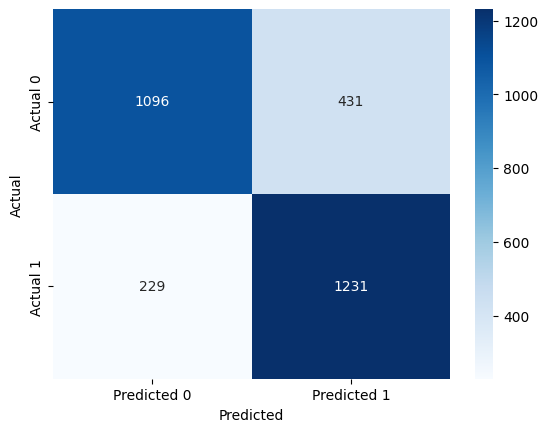

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# kNN with W2vect

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
#print(classification_report(y_test, y_pred))

In [41]:
y_pred = knn_model.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')


Overall Accuracy: 0.6913929784824462
Class 0 - Precision: 0.8697289156626506, Recall: 0.756385068762279, F1-score: 0.8091068301225919, Support: 1527
Class 1 - Precision: 0.7757685352622061, Recall: 0.8815068493150685, F1-score: 0.8252645078550817, Support: 1460


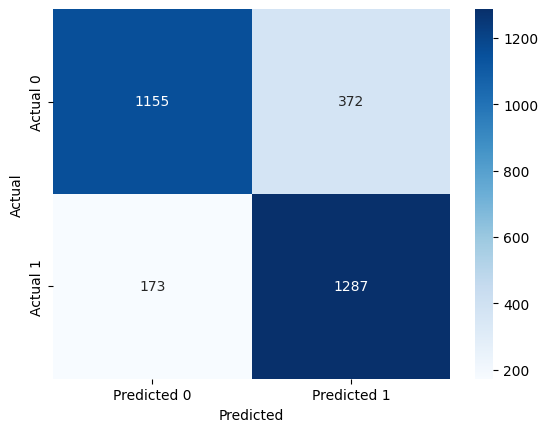

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression with W2vect

In [43]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(C=5, penalty='l1', solver='liblinear')
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
#print(classification_report(y_test, y_pred))

In [42]:
y_pred = lg_model.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.7993975903614458
Class 0 - Precision: 0.9111570247933884, Recall: 0.8664047151277013, F1-score: 0.8882175226586103, Support: 1527
Class 1 - Precision: 0.867100977198697, Recall: 0.9116438356164384, F1-score: 0.8888146911519199, Support: 1460


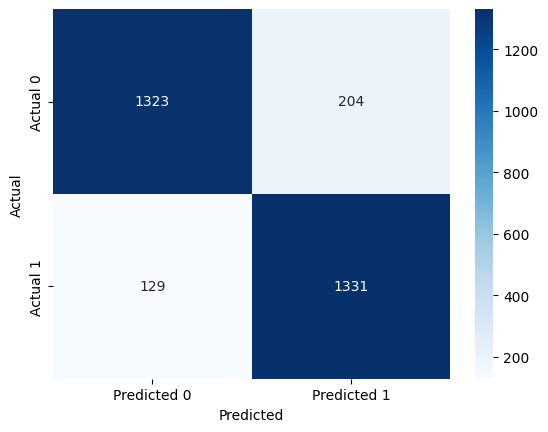

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decison Tree with W2vect

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train, y_train)

In [ ]:
#print(classification_report(y_test, y_pred))

In [33]:
y_pred = dt_model.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.5888297872340426
Class 0 - Precision: 0.7490092470277411, Recall: 0.7426326129666012, F1-score: 0.7458073002301874, Support: 1527
Class 1 - Precision: 0.7331975560081466, Recall: 0.7397260273972602, F1-score: 0.7364473235594953, Support: 1460


# Confusion Matrix for DT Model :
Display the matrix with TP, TN, FP, FN counts.
https://chatgpt.com/share/2f5dfec4-026c-4017-944e-7720f539930f

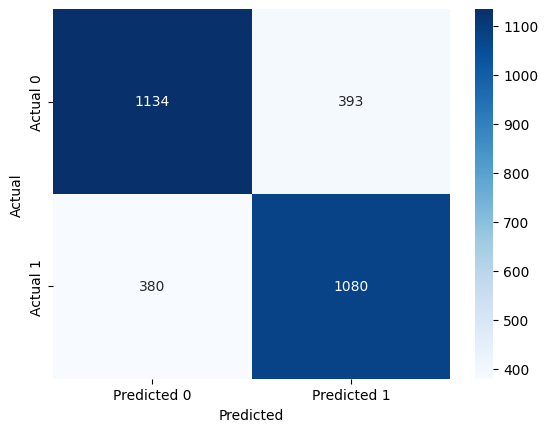

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM with W2vect

In [35]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
#print(classification_report(y_test, y_pred))

In [36]:
# Compute predictions
y_pred = svm_model.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.8086587950348169
Class 0 - Precision: 0.9172984148862853, Recall: 0.8716437459070072, F1-score: 0.8938885157824044, Support: 1527
Class 1 - Precision: 0.8723958333333334, Recall: 0.9178082191780822, F1-score: 0.8945260347129507, Support: 1460


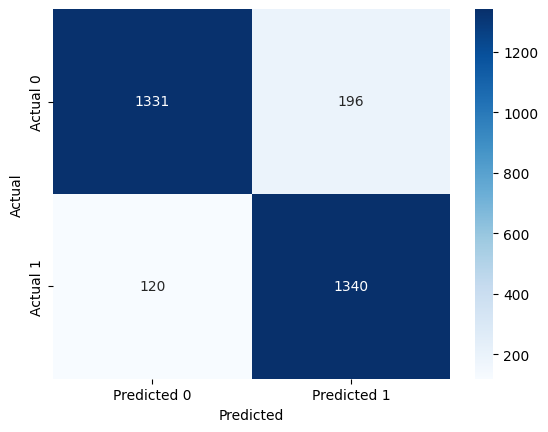

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()